# Exploring the corpus

In [1]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## Description du corpus

In [2]:
path = "../data/txt/"
files = sorted(os.listdir(path))

In [3]:
files[:10]

['Bxl_1847_Tome_I1_Part_1.txt',
 'Bxl_1847_Tome_I1_Part_2.txt',
 'Bxl_1847_Tome_I1_Part_3.txt',
 'Bxl_1847_Tome_I1_Part_4.txt',
 'Bxl_1847_Tome_I1_Part_5.txt',
 'Bxl_1848_Tome_I1_Part_1.txt',
 'Bxl_1848_Tome_I1_Part_2.txt',
 'Bxl_1848_Tome_I1_Part_3.txt',
 'Bxl_1849_Tome_I1_Part_1.txt',
 'Bxl_1849_Tome_I1_Part_2.txt']

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [4]:
chaine = 'Bxl_1849_Tome_II1_Part_5.txt'

In [5]:
type(chaine)

str

In [6]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['Bxl', '1849', 'Tome', 'II1', 'Part', '5.txt']

In [7]:
# Accéder à l'année
year = chaine_split[1]
year

'1849'

In [8]:
# Manupuler les str pour convertir une année en décennie
year[3:]

'9'

In [9]:
year[-1]

'9'

In [10]:
year[3:] + '0s'

'90s'

In [11]:
all_years = [str(year) for year in range(1847, 1979)]

In [12]:
all_years[:10]

['1847',
 '1848',
 '1849',
 '1850',
 '1851',
 '1852',
 '1853',
 '1854',
 '1855',
 '1856']

In [13]:
dic = defaultdict(int)
dic2 = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f:
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        dic[decade] += 1
        dic2[city] += 1
        dic2[tome] += 1
    else:
        print(f"Anomalous file: {f}")

In [14]:
print(f"There are {dic2['Bxl']} bulletins from Brussels and {dic2['Lkn']} from Laeken")

There are 213 bulletins from Brussels and 0 from Laeken


In [15]:
nb_rap = dic2['RptAn']
print(f"{len(files)-nb_rap-1} are real bulletins and {nb_rap} are annual reports")

212 are real bulletins and 0 are annual reports


In [16]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Missing years: {', '.join(missing_years)}")

Missing years: 1853, 1868, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978


## Visualisation du nombre de bulletins par décennies

Ces visualisations sont obtenus avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

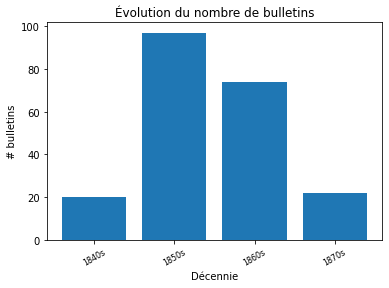

In [17]:
def plot_bar():
    index = np.arange(len(dic))
    plt.bar(index, dic.values())
    plt.xlabel('Décennie')
    plt.ylabel('# bulletins')
    plt.xticks(index, dic.keys(), fontsize=8, rotation=30)
    plt.title('Évolution du nombre de bulletins')
    plt.show()

plot_bar()